<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/easy.png" width="750">

# Intro to Pipeline

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/pipe.png" width="1200">



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = 10*np.random.normal(0,1,70)
y_train = 10*(-X_train**2) + np.random.normal(-100,100,70)

X_train = X_train.reshape(-1,1)
X_train.shape

(70, 1)

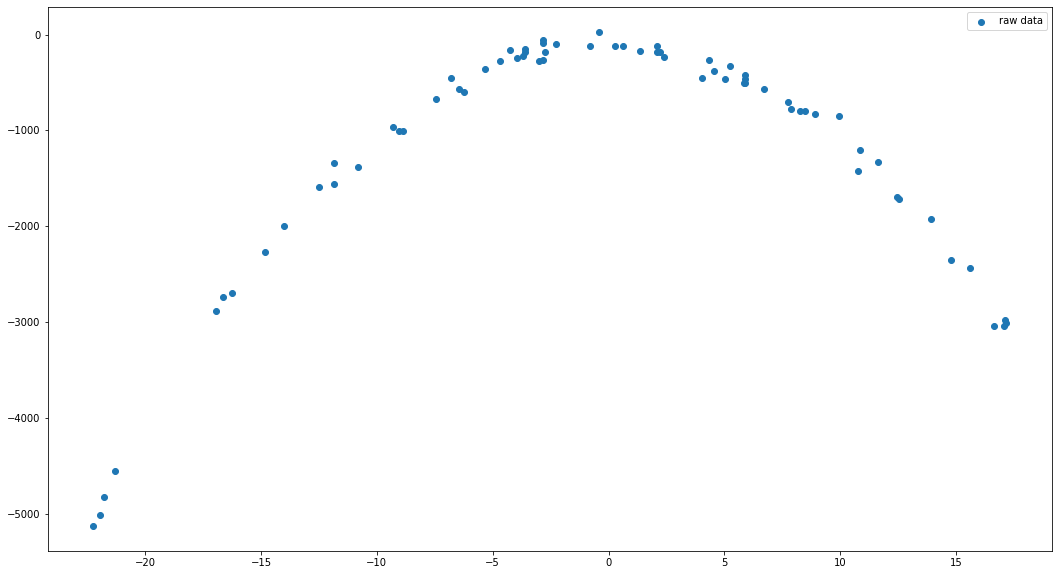

In [3]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.legend();

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)  # always target must be ndim==2!!!

X_test = np.linspace(-30,30,100).reshape(-1,1)

#Prediction
y_pred = lr.predict(X_test)  

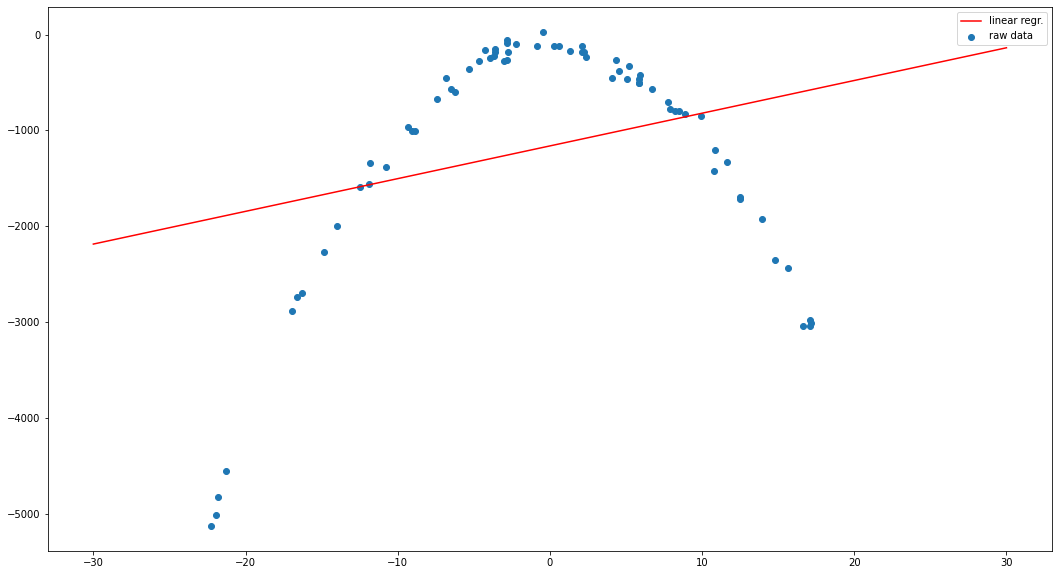

In [5]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.legend();

## PolynomialFeatures
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [6]:
## Using Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline ([
                  ('transform_data',PolynomialFeatures(degree=2)),
                  ('estimator',LinearRegression()),
                  ])

pipe.fit(X_train,y_train)  # always target must be ndim==2!!!

#pipeline Prediction
poly_pred = pipe.predict(X_test)  

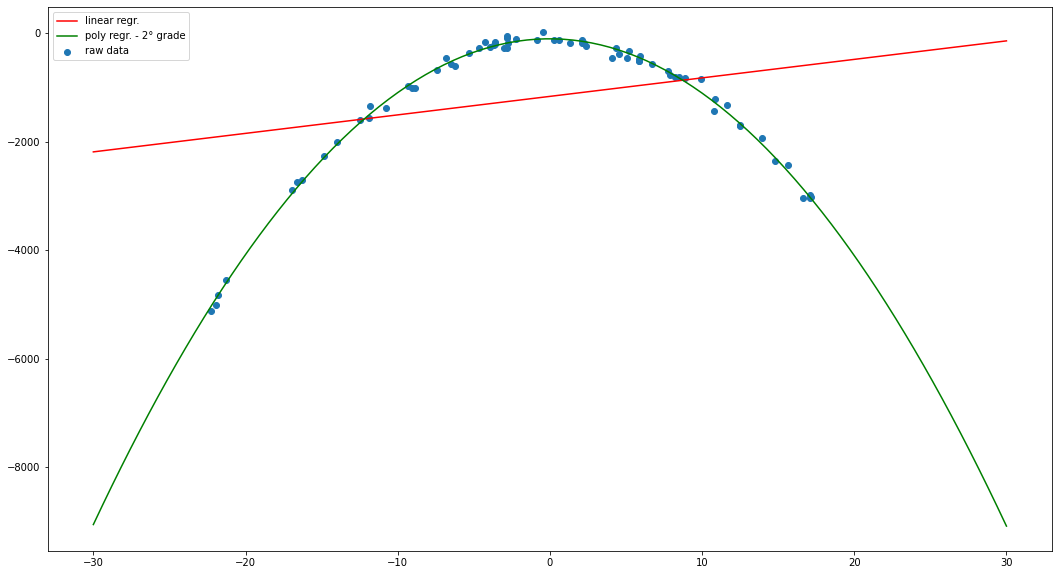

In [7]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.plot(X_test,poly_pred, color='green',label="poly regr. - 2° grade");
plt.legend();

## PolynomialFeatures Iterators

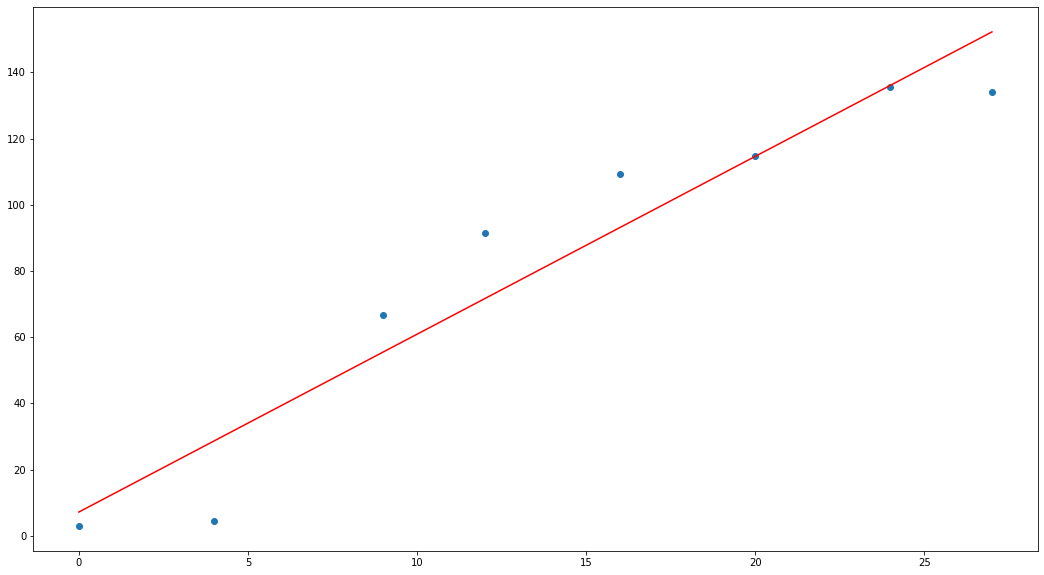

In [8]:
x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

lr = LinearRegression()
x = x.reshape(-1,1)
lr.fit(x,y)  # always target must be ndim==2!!!

#Prediction
y_pred = lr.predict(x)  

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="sample data");
plt.plot(x, y_pred,'-r')

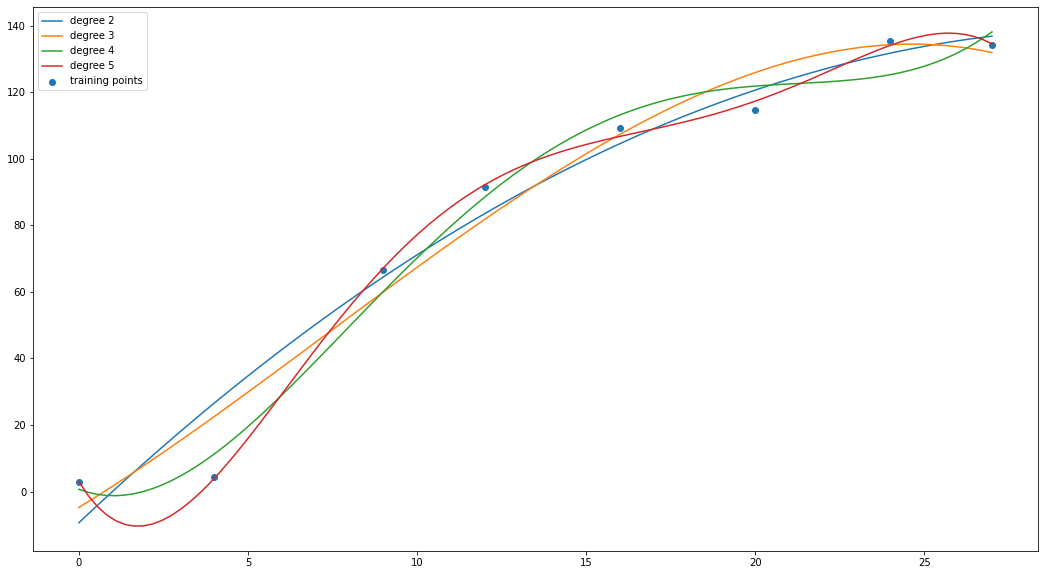

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

x_plot = np.linspace(0, max(x), 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]            # equal to .reshape(-1,1)
X_plot = x_plot[:, np.newaxis]  # equal to .reshape(-1,1)

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="training points")

for degree in np.arange(2, 6, 1):
    model = make_pipeline(PolynomialFeatures(degree),
                          LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc=2);

##Pipeline Classification KBest

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

x, y = make_classification(
    n_features=22,
    n_informative=5,
    n_redundant=0,
    n_classes=4,
    n_clusters_per_class=4,
    random_state=44,
)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=667)

anova_filter = SelectKBest(f_classif, k=3)
classifier = LogisticRegression()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('featureselection',anova_filter),
        ('classifier', classifier)
        ])

#training the pipeline 
pipe.fit(X_train, y_train)
# accuracy score on the test data
y_pred = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.44


## Pipeline in production

In [ ]:
import pandas as pd
import numpy as npf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data['data'], #X
                                                    data['target'], #y
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

### The pipeline we are going to setup is composed of the following tasks:

- Data Normalization: in this tutorial we have selected three different normalization methods, including the QuantileTransformer (check out the documentation)..
- Dimensionality Reduction: we selected Principal Component Analysis (PCA) and a univariate feature selection algorithm as possible candidates.
- Regression: we apply a simple regularized linear method, although the method is easily extendable to other learning algorithms.

In [ ]:
scaler = StandardScaler()
pca = PCA()
ridge = Ridge()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', Ridge())
        ])

In [ ]:
pipe = pipe.fit(X_train, y_train)
print('Testing score: ', pipe.score(X_test, y_test))

Testing score:  -1055.397951032578


In [ ]:
print(pipe.steps[1][1].explained_variance_)

[1.00283286 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286
 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286
 1.00283286]


<img src="https://iaml.it/blog/optimizing-sklearn-pipelines/images/pipeline-diagram.png" width="1200">




## PIPELINE TUNING (BASE VERSION)



In [ ]:
import numpy as np
n_features_to_test = np.arange(1, 11)

In [ ]:
alpha_to_test = 2.0**np.arange(-6, +6)

In [ ]:
params = {'reduce_dim__n_components': n_features_to_test,\
              'regressor__alpha': alpha_to_test}

In [ ]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)
print('Final score is: ', gridsearch.score(X_test, y_test))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Final score is:  -831.3059716845097


In [ ]:
gridsearch.best_params_

{'reduce_dim__n_components': 10, 'regressor__alpha': 4.0}

## PIPELINE TUNING (ADVANCED VERSION)


In [ ]:
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer()]


In [ ]:
params = [
        {'scaler': scalers_to_test,
         'reduce_dim': [PCA()],
         'reduce_dim__n_components': n_features_to_test,\
         'regressor__alpha': alpha_to_test},

        {'scaler': scalers_to_test,
         'reduce_dim': [SelectKBest(f_regression)],
         'reduce_dim__k': n_features_to_test,\
         'regressor__alpha': alpha_to_test}
        ]

In [ ]:
gridsearch = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)
print('Final score is: ', gridsearch.score(X_test, y_test))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Final score is:  -2667.8024968945897


In [ ]:
gridsearch.best_params_

{'reduce_dim': SelectKBest(k=9, score_func=<function f_regression at 0x7ff6356303b0>),
 'reduce_dim__k': 9,
 'regressor__alpha': 8.0,
 'scaler': StandardScaler()}